# Proyecto BIOGENESYS


## Avance 1 - Pandas Almacenar y manipular base de datos   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 #configuración de estilos
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
%matplotlib inline


#### 3. Carga


In [3]:
# 3. Carga del data set.
archivo_biogenesys = "C:\\Users\\Bruger\\Downloads\\data_latinoamerica.csv"
df_biogenesys= pd.read_csv(archivo_biogenesys)   


 ### 4. Comprobación de registros

In [4]:
# 4. Comprobacion de la cantidad de registros y columnas especificadas. 
print("Comprobacion del data set") 
print(df_biogenesys.shape)

Comprobacion del data set
(12216057, 50)


### 5.Filtrar por países interesados a expandir


In [5]:
### 5.Filtrar por países interesados a expandir

# 5. paso 1 - Definir Paises a los que se quieren expandir
paises_expansion = ["Colombia", "Argentina", "Chile", "Mexico", "Peru","Brazil"] 
 # chequear lista de paises
print(df_biogenesys['country_name'].unique()) 
# 5. paso 2 - Usando con ISIN filtrar paises_expansion y hacer copia segura.
df_paises_filtrados = df_biogenesys[df_biogenesys["country_name"].isin(paises_expansion)].copy()  
# Imprimo cantidad de registros despues de filtrar.
print("Registros despues de seleccionar paises de expansion:", df_paises_filtrados.shape)    

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']
Registros despues de seleccionar paises de expansion: (11970289, 50)


### 6.Filtrar por fecha

In [6]:
# 6. paso 1- Columna date es tipo String conviertir a formato fecha (Datetime)
df_paises_filtrados["date"] = pd.to_datetime(df_paises_filtrados["date"], errors="coerce") 


In [7]:
 #6. paso 2- definir comienzo de fecha  
fecha_objetivo = pd.to_datetime('2021-01-01') 

In [8]:
# 6. paso final filtrar por fecha 
df_filtrado_fecha = df_paises_filtrados[df_paises_filtrados['date'] > fecha_objetivo] 

In [9]:
#chequeo y comparo registros filtrado por pais y luego por filtrado por fecha
print(df_paises_filtrados.shape)
print(df_filtrado_fecha.shape)

(11970289, 50)
(7537296, 50)


### 7. Verificar NAN

In [10]:
#7. Verificar la cantidad de valores nulos por país
valores_faltantes = df_filtrado_fecha.groupby('country_name').apply(lambda x: x.isnull().sum())
print(valores_faltantes)

              location_key  date  country_code  country_name  new_confirmed  \
country_name                                                                  
Argentina                0     0             0             0          83546   
Brazil                   0     0             0             0          17281   
Chile                    0     0             0             0         154730   
Colombia                 0     0             0             0         495068   
Mexico                   0     0             0             0        1416447   
Peru                     0     0             0             0         992812   

              new_deceased  cumulative_confirmed  cumulative_deceased  \
country_name                                                            
Argentina            83546                 83546                83546   
Brazil               19940                 17281                19940   
Chile               154730                154730               154730   
Co

C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1149485442.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valores_faltantes = df_filtrado_fecha.groupby('country_name').apply(lambda x: x.isnull().sum())


### 8. Normalización del data set 

####  Operar sobre filas y columnas con valores totalmente NAN 

In [11]:
df_nan = df_filtrado_fecha.dropna(axis = 0 , how = "all") #Quitar filas totalmente en NAN
df_nan = df_filtrado_fecha.dropna(axis = 1 , how = "all") #Quitar columnas totalmente en NAN

In [12]:
#Verifico nomenclaturas mal escritas
print(df_nan['location_key'].unique())

['AR' 'AR_A' 'AR_A_007' ... 'PE_UCA_0304' 'PE_UCA_0305' 'PE_UCA_0401']


In [13]:
df_retocado = df_nan[df_nan['location_key'].isin(["AR", "CL", "CO", "MX", "PE", "BR"])]


In [14]:
df_retocado.shape

(3744, 50)

In [15]:
#evaluamos las dimensiones de nuetro DF_retocado 
df_retocado.shape
df_retocado.isnull().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

#### Elimino NAN

In [16]:
#Veo lista de columnas con NAN
df_retocado.isnull().sum()[df_retocado.isnull().sum()>1000]

new_recovered           2116
cumulative_recovered    2736
dtype: int64

In [17]:
# Defino variable columnas con nulos
columnas_a_remover = df_retocado.isnull().sum()[df_retocado.isnull().sum()>1000]

In [18]:
# Almacenos la lista de columnas dentro de una variable

columnas_eliminar= columnas_a_remover.index 


In [19]:
#Elimino Listas de columnas NAN > mil

df_retocado = df_retocado.drop(columns= columnas_eliminar)

In [20]:
#Vemos como se eliminaron las columnas
print(df_retocado.shape)

(3744, 48)


#### Guardo data set

In [21]:
#guardo
df_retocado.to_csv("Data_Latam_CovidF.csv", index=False)

In [22]:
#Veo lista de columnas con NAN
df_retocado.isnull().sum()[df_retocado.isnull().sum()>0]

new_confirmed                             21
new_deceased                              21
cumulative_confirmed                      21
cumulative_deceased                       21
cumulative_vaccine_doses_administered    584
average_temperature_celsius               42
minimum_temperature_celsius               41
maximum_temperature_celsius               41
rainfall_mm                               90
relative_humidity                         42
dtype: int64

#### Negativos a Positivos 

In [23]:
# Mostrar solo los valores negativos de la columna new_confirmed
print(df_retocado[df_retocado["new_confirmed"] < 0]["new_confirmed"])



550634   -573.0
Name: new_confirmed, dtype: float64


In [24]:
# Convertir todos los valores negativos a positivos en 'new_confirmed'

df_retocado.loc[:, 'new_confirmed'] = df_retocado['new_confirmed'].abs()


#### Relleno de columnas NAN

In [25]:
# Rellenar "cumulative_confirmed" y "cumulative_deceased" con el ultimo valor valido para mantener el acumulado mas conservado.
df_retocado.loc[:, "cumulative_confirmed"] = df_retocado["cumulative_confirmed"].ffill()
df_retocado.loc[:, "cumulative_deceased"] = df_retocado["cumulative_deceased"].ffill()
#use loc por SettingWithCopyWarning

In [26]:
#Relleno columnas "maximum_temperature" y "minimum_temperature" con valores del dia anterior
df_retocado["minimum_temperature_celsius"] = df_retocado["minimum_temperature_celsius"].ffill()
df_retocado["maximum_temperature_celsius"] = df_retocado["maximum_temperature_celsius"].ffill()

In [27]:
#Relleno con la media "rainfall_mm" , "relative_humidity" ,"average_temperature_celsius" ,"new_deceased" y "new_confirmed"
df_retocado["rainfall_mm"] = df_retocado["rainfall_mm"].fillna(df_retocado["rainfall_mm"].mean())
df_retocado["relative_humidity"] = df_retocado["relative_humidity"].fillna(df_retocado["relative_humidity"].mean())
df_retocado["average_temperature_celsius"] = df_retocado["average_temperature_celsius"].fillna(df_retocado["average_temperature_celsius"].mean())
df_retocado["new_confirmed"] = df_retocado["new_confirmed"].fillna(df_retocado["new_confirmed"].mean())
df_retocado["new_deceased"] = df_retocado["new_deceased"].fillna(df_retocado["new_deceased"].mean())

In [28]:
df_retocado['cumulative_vaccine_doses_administered'] = (df_retocado.sort_values(['country_name', 'date']) .groupby('country_name')['cumulative_vaccine_doses_administered'].ffill())


In [29]:
#Veo lista de columnas con NAN
df_retocado.isnull().sum()[df_retocado.isnull().sum()>0]

cumulative_vaccine_doses_administered    103
dtype: int64

In [30]:
# Todavia me siguen quedando nulos que no se han rellenado por que al parecer no cuentan con informacion anterior 
# por lo tanto pueden ser comienzos de fechas donde en los paises no habian vacunas es mejor que se rellenen con 0

df_retocado['cumulative_vaccine_doses_administered'] = (
    df_retocado['cumulative_vaccine_doses_administered'].fillna(0)
)


In [31]:
#Veo lista de columnas con NAN
df_retocado.isnull().sum()[df_retocado.isnull().sum()>0]

Series([], dtype: int64)

#### Categorización de rangos etarios


In [32]:
# Niños: se suman todos los de 0 a 9 años, y la mitad de los de 10 a 19 (asumiendo que la mitad tiene entre 10 y 14 años)
df_retocado['population_niños'] = df_retocado['population_age_00_09'] + df_retocado['population_age_10_19'] * 0.5
# Adolescentes: se considera la otra mitad del grupo 10-19 (aprox. 15 a 19 años) más la mitad del grupo 20-29 (aprox. 20 a 24 años)
df_retocado['population_adolescentes'] = df_retocado['population_age_10_19'] * 0.5 + df_retocado['population_age_20_29'] * 0.5
# Adultos jóvenes: incluye la segunda mitad de 20-29 (25 a 29 años), todo el grupo de 30-39 y todo el grupo de 40-49 (es decir, 25 a 49 años)
df_retocado['population_adultos_jovenes'] = df_retocado['population_age_20_29'] * 0.5 + df_retocado['population_age_30_39'] + df_retocado['population_age_40_49']
# Adultos mayores: agrupa a las personas de 50 a 69 años, que están en edad de pre-jubilación o jubilación reciente
df_retocado['population_adultos_mayores'] = df_retocado['population_age_50_59'] + df_retocado['population_age_60_69']
# Tercera edad: incluye a los adultos mayores de 70 años, sumando los de 70 a 79 y los de 80 o más
df_retocado['population_tercera_edad'] = df_retocado['population_age_70_79'] + df_retocado['population_age_80_and_older']


In [33]:
columnas_edad_original = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

df_retocado.drop(columns=columnas_edad_original, inplace=True)

In [34]:
### Niños: de 0 a asumiendo 0.5 hasta 14 años
# Adolescentes: aprox. 15 a  24 años
# Adultos jóvenes: de 25 49 años
# Adultos mayores: de 50 a 69 años, que están en edad de pre-jubilación o jubilación reciente.
# Tercera edad: incluye a los adultos mayores de 70 años a 80 o más.
df_retocado.head(15)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,population_niños,population_adolescentes,population_adultos_jovenes,population_adultos_mayores,population_tercera_edad
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
371,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
372,AR,2021-01-07,AR,Argentina,13722.0,160.0,1731824.0,47453.0,42092.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
373,AR,2021-01-08,AR,Argentina,13932.0,162.0,1745756.0,47615.0,54090.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
374,AR,2021-01-09,AR,Argentina,9959.0,158.0,1755715.0,47773.0,58552.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
375,AR,2021-01-10,AR,Argentina,5174.0,165.0,1760889.0,47938.0,59043.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0
376,AR,2021-01-11,AR,Argentina,13076.0,170.0,1773965.0,48108.0,67496.0,44938712.0,...,76.52,147.086,79.483,26.6,15.8,10241627.5,6738085.5,13499602.0,6826194.0,2811587.0


#### Cambios de formato

In [35]:
df_retocado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64

In [36]:
#de columnas de conteos de personas no puede haber  FLOAT cambiar a   Enteros 
conteos = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'population', 'population_male', 'population_female',
    'population_niños', 'population_adolescentes', 'population_adultos_jovenes',
    'population_adultos_mayores', 'population_tercera_edad','cumulative_vaccine_doses_administered'
]

df_retocado[conteos] = df_retocado[conteos].astype('int64')

In [37]:
df_retocado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   int64         
 5   new_deceased                           3744 non-null   int64         
 6   cumulative_confirmed                   3744 non-null   int64         
 7   cumulative_deceased                    3744 non-null   int64         
 8   cumulative_vaccine_doses_administered  3744 non-null   int64         
 9   population                             3744 non-null   int64  

### 9. Variables clave  

In [38]:
variables_clave = [
    'country_name', 'date',
    'new_confirmed', 'new_deceased',
    'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 
    'smoking_prevalence', 'diabetes_prevalence',
    'area_urban_sq_km','average_temperature_celsius',             
    'minimum_temperature_celsius',                 
    'maximum_temperature_celsius',
    'latitude', 'longitude', 
    'pollution_mortality_rate', 'comorbidity_mortality_rate',
    'nurses_per_1000',  'physicians_per_1000',
    'gdp_usd',  'gdp_per_capita_usd',  'human_development_index',
    'population_density', 'rainfall_mm','relative_humidity','average_temperature_celsius',
    'population_rural', 'population_urban',
    'infant_mortality_rate',
    'life_expectancy',
    'population_male', 'population_female',
    'population', 
    'population_niños',
    'population_adolescentes', 
    'population_adultos_jovenes', 
    'population_adultos_mayores', 
    'population_tercera_edad'
]



### 10. Guardar dataset filtrado

In [39]:
# definir variable de columnas claves
df_variables_clave = df_retocado[variables_clave]

#guardar archivo
df_variables_clave.to_csv("DatosFinalesFiltrado.csv", index=False)



### 11. Estadisticas con bucle for 

In [40]:
#Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default.

# Lista de columnas numéricas que queremos analizar
columnas_numericas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed','cumulative_deceased',
                      'cumulative_vaccine_doses_administered', 'minimum_temperature_celsius',                 
                       'maximum_temperature_celsius', 'population', ]

# Lista para guardar los resultados
resultados = []

# Agrupar por país
for pais, grupo in df_variables_clave.groupby("country_name"):
    for col in columnas_numericas:
        resultados.append({
            'País': pais,
            'Variable': col,
            'Media': grupo[col].mean(),
            'Mediana': grupo[col].median(),
            'Desviación estándar': grupo[col].std(),
            'Mínimo': grupo[col].min(),
            'Máximo': grupo[col].max(),
            'Rango': grupo[col].max() - grupo[col].min(),
            'Varianza': grupo[col].var()
        })

# Convertir a DataFrame
estadisticas_df = pd.DataFrame(resultados)

# Mostrar
pd.set_option('display.float_format', '{:.2f}'.format)  # para ver  con 2 decimales  :.2f.format
print(estadisticas_df)


         País                               Variable        Media  \
0   Argentina                          new_confirmed     12917.95   
1   Argentina                           new_deceased       135.29   
2   Argentina                   cumulative_confirmed   6102772.21   
3   Argentina                    cumulative_deceased    105870.70   
4   Argentina  cumulative_vaccine_doses_administered  35256054.71   
5   Argentina            minimum_temperature_celsius         9.16   
6   Argentina            maximum_temperature_celsius        25.35   
7   Argentina                             population  44938712.00   
8      Brazil                          new_confirmed     43104.60   
9      Brazil                           new_deceased       785.81   
10     Brazil                   cumulative_confirmed  22578621.67   
11     Brazil                    cumulative_deceased    546468.83   
12     Brazil  cumulative_vaccine_doses_administered 213538268.20   
13     Brazil            minimum_t

#### Contestar las preguntas sobre punto 11

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
Las estadísticas descriptivas como la media, mediana, desviación estándar, mínimo, máximo y percentiles
Hacen un resumen rapido de las variables importantes que nos interesan analizar
por ejemplo, permiten identificar valores atipicos, tendencias centrales y dispersión tambien poder hacer comparaciones viendo los minimos y los maximos o una media muy alta en algo puede puntualizar la comparacion con otro (ej. un pais con media alta de fallecidos en comparacion con otro)

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No, se aplicaran a columnas que es posible y coherente realizar el calculo por empezar que sea númerica. Por ejemplo las columnas de poblacion darian siempre 0 o numeros iguales ya que son datos que no cambian. 

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
Columnas como nombre de paises por ejemplo, no tienen sentido para estos calculos, la buena interpretación luego de saber que calcular, obviamente hace la diferencia en la busqueda de insights; por otro lado , la mala interpretación o los calculos incoherentes pueden inválidar tu análisis y no hacerlo confiable.

### 12.

In [41]:
#Crea una función que permita obtener la mediana, varianza y el rango con bucle for. 



def calcular_estadisticas(df, columnas):
    resultados = []

    for col in columnas:
        if pd.api.types.is_numeric_dtype(df[col]):
            datos = df_variables_clave[col].dropna()
            mediana = datos.median()
            varianza = datos.var()
            rango = datos.max() - datos.min()

            resultados.append({
                'Columna': col,
                'Mediana': mediana,
                'Varianza': varianza,
                'Rango': rango
            })

    return pd.DataFrame(resultados)

# Aplicación de la función al DataFrame filtrado
columnas_numericas = df_variables_clave.select_dtypes(include='number').columns
estadisticas_resumen = calcular_estadisticas(df_variables_clave, columnas_numericas)
estadisticas_resumen



,Columna,Mediana,Varianza,Rango
0,new_confirmed,5227.00,585894258.74,298408.00
1,new_deceased,101.00,257070.33,11447.00
2,cumulative_confirmed,3643377.00,64081091330927.14,34567862.00
3,cumulative_deceased,139628.50,33487916463.66,685202.00
4,cumulative_vaccine_doses_administered,47784908.00,8751375229164421.00,347868481.00
5,smoking_prevalence,13.95,114.54,33.00
6,diabetes_prevalence,8.00,6.65,7.60
7,area_urban_sq_km,45582.00,2036294523.67,122954.00
8,minimum_temperature_celsius,15.86,49.10,38.38
9,maximum_temperature_celsius,27.41,27.58,34.99


¿Qué representa la mediana?
La mediana es el valor central de un conjunto de datos ordenado. Es decir, la mitad de los valores están por debajo y la otra mitad por encima. A diferencia de la media, no se ve afectada por valores extremos o atípicos, por lo que da una mejor idea del valor típico promedio, cuando hay mucha dispersión.

¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
cumulative_confirmed tiene una varianza altísima (más de 64 mil millones) y un rango muy grande, lo que indica una gran variabilidad entre países y fechas.

En cambio, diabetes_prevalence tiene una varianza pequeña (6.64) y un rango de solo 7.6, lo que indica poca variación entre regiones, es decir, la prevalencia de diabetes es relativamente constante.

¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
Cuando la varianza y el rango son altos, significa que los datos están muy dispersos en torno a la mediana. Esto puede indicar diferencias marcadas entre países o regiones, o también presencia de valores atípicos.

Cuando ambas medidas son bajas, quiere decir que los datos son más consistentes y que la mediana representa bien al conjunto.

Ejemplo:

smoking_prevalence tiene una mediana de 13.95 y una varianza de 114.5 → hay algo de variabilidad, pero probablemente sin extremos.

cumulative_vaccine_doses_administered tiene una mediana de casi 48 millones, pero con una varianza y un rango enormes, lo que implica que la vacunación fue muy desigual entre países.

## Avance 2 - Análisis Exploratorio y Visualización


#### - Calculos clave 

In [ ]:
# Creo metricas de variables clave muertes, casos, vacunacion pero todo por mil habitantes ej. nursepormil medicospormil mis metricas quedan armonizadas.
df_retocado['muertes_por_1000'] = (df_retocado['cumulative_deceased'] / df_retocado['population']) * 1000

df_retocado['vacunas_por_1000'] = (df_retocado['cumulative_vaccine_doses_administered'] / df_retocado['population']) * 1000
# Crear una nueva columna con la población máxima por país
#df_retocado['poblacion_pais'] = df_retocado.groupby('country_name')['population'].transform('max')
# Calcular vacunas por cada 1000 habitantes, usando esa población fija por país
#df_retocado['vacunas_por_1000'] = (df_retocado['cumulative_vaccine_doses_administered'] / df_retocado['poblacion_pais']) * 1000

df_retocado['tasa_letalidad_por_1000'] = (df_retocado['muertes_por_1000'] / df_retocado['casos_por_1000'])*1000
df_retocado['tasa_recuperacion_por_1000'] = 1000 - df_retocado['tasa_letalidad_por_1000']
df_retocado['casos_activos_estimados'] = ( df_retocado['cumulative_confirmed'] - df_retocado['cumulative_deceased'])
df_retocado['casos_activos_por_1000'] = ( df_retocado['casos_activos_estimados'] / df_retocado['population']) * 1000

# Calcular la tasa de letalidad
df_retocado['letalidad'] = (df_retocado['new_deceased'] / df_retocado['new_confirmed']) * 100



In [43]:

print(df_retocado.columns)


Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'gdp_usd', 'gdp_per_capita_usd', 'latitude', 'longitude', 'area_sq_km',
       'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
       'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_male_mortality_rate', 'adult_female_mortality_rate',
       'pollution_mortality_rate', 'comorbidity_mortality_rate',
       'population_niños', 'population_adolescentes',
       'population

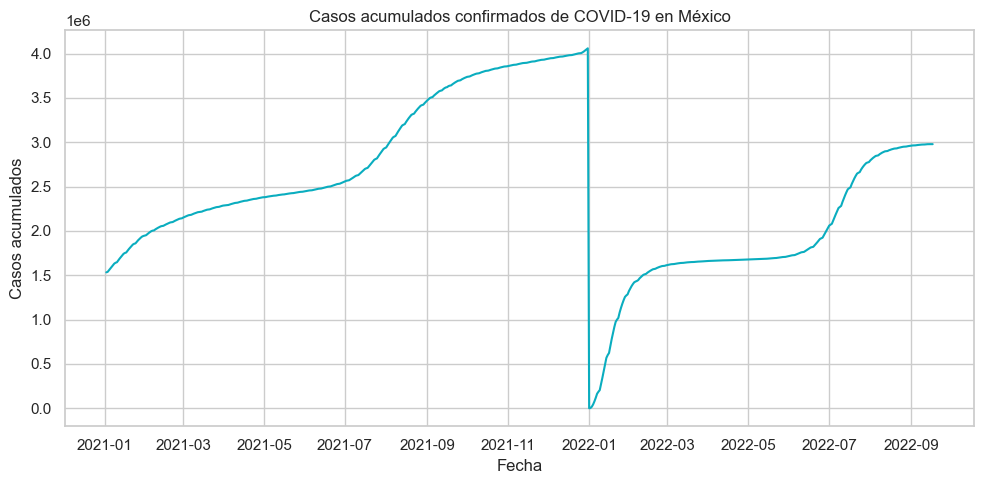

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo los datos de México desde el DataFrame principal
df_mexico = df_retocado[df_retocado['country_name'] == 'Mexico'].copy()

# Asegurarse de que la columna 'date' sea tipo datetime
df_mexico['date'] = pd.to_datetime(df_mexico['date'])

# Ordenar por fecha
df_mexico = df_mexico.sort_values('date')

# Gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(df_mexico['date'], df_mexico['cumulative_confirmed'], color='#0AADBF')
plt.title('Casos acumulados confirmados de COVID-19 en México')
plt.xlabel('Fecha')
plt.ylabel('Casos acumulados')
plt.grid(True)
plt.tight_layout()
plt.show()



 Como se puede observar muestra una incongruencia que inicia el primer dia del año 2022

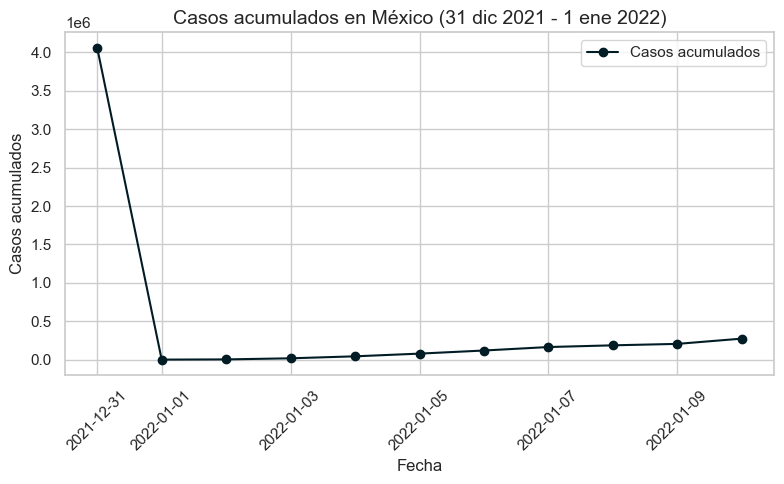

In [45]:

# Filtrar el país México
df_mexico = df_retocado[df_retocado['country_name'] == 'Mexico'].copy()

# Filtrar específicamente el 31 de diciembre de 2021 y el 1 de enero de 2022
fecha_inicio = '2021-12-31'
fecha_fin = '2022-01-10'

df_mexico_periodo = df_mexico[
    (df_mexico['date'] >= fecha_inicio) & (df_mexico['date'] <= fecha_fin)
].sort_values('date')

# Graficar los casos acumulados en ese intervalo
plt.figure(figsize=(8, 5))
plt.plot(df_mexico_periodo['date'], df_mexico_periodo['cumulative_confirmed'],
         marker='o', linestyle='-', color='#021C26', label='Casos acumulados')

plt.title('Casos acumulados en México (31 dic 2021 - 1 ene 2022)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Casos acumulados')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


no solo la columna de casos acumulados si no que tambien la columna de muertes acumuladas a parit del primer dia del año dejaba de ser acumulativa para mostras los totales absolutos por dia sin acumularlos 
A continuacion, se paso a separar la columna y calcular la acumulacion a partir de la fecha especificada y se hizo la union de la columna nuevamente 

In [46]:
import matplotlib.pyplot as plt

# Asegurar formato de fecha
df_retocado['date'] = pd.to_datetime(df_retocado['date'])

# Filtrar México y ordenar
df_mexico = df_retocado[df_retocado['country_name'] == 'Mexico'].copy()
df_mexico = df_mexico.sort_values('date')

# Separar antes y después de 2022
df_mexico_before_2022 = df_mexico[df_mexico['date'] <= '2021-12-31'].copy()
df_mexico_2022 = df_mexico[df_mexico['date'] > '2021-12-31'].copy()

# Corregir cumulative_confirmed
ultimo_confirmed_2021 = df_mexico_before_2022['cumulative_confirmed'].iloc[-1]
df_mexico_2022['daily_confirmed'] = df_mexico_2022['cumulative_confirmed'].diff().fillna(0)
df_mexico_2022['cumulative_confirmed'] = df_mexico_2022['daily_confirmed'].cumsum() + ultimo_confirmed_2021

# Corregir cumulative_deceased
ultimo_deceased_2021 = df_mexico_before_2022['cumulative_deceased'].iloc[-1]
df_mexico_2022['daily_deceased'] = df_mexico_2022['cumulative_deceased'].diff().fillna(0)
df_mexico_2022['cumulative_deceased'] = df_mexico_2022['daily_deceased'].cumsum() + ultimo_deceased_2021

# Unir y ordenar
df_mexico_corr = pd.concat([df_mexico_before_2022, df_mexico_2022], ignore_index=True)
df_mexico_corr = df_mexico_corr.sort_values('date').reset_index(drop=True)

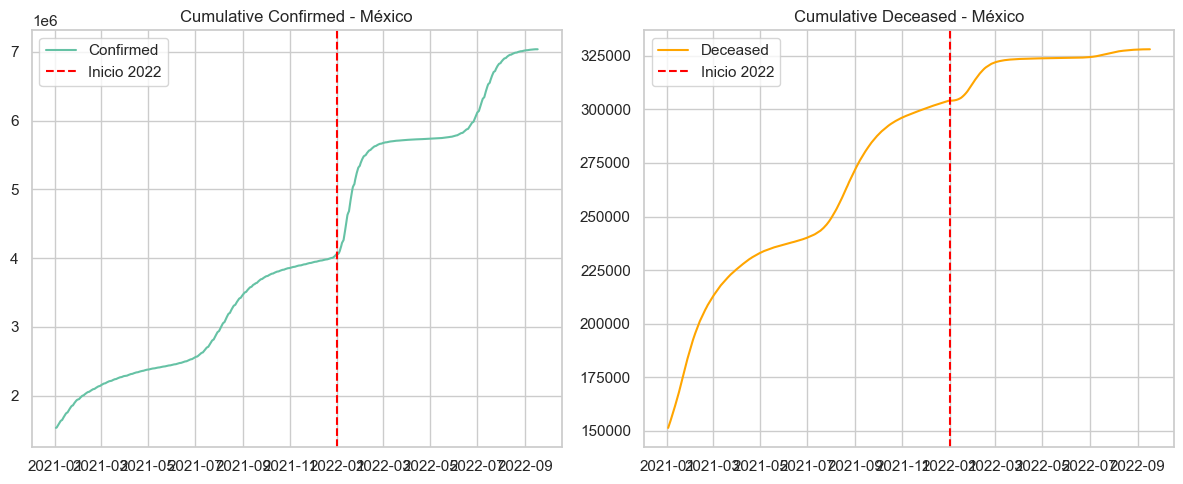

In [47]:
# Verificar visualmente que ambas columnas fueron corregidas

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_mexico_corr['date'], df_mexico_corr['cumulative_confirmed'], label='Confirmed')
plt.axvline(pd.to_datetime('2022-01-01'), color='red', linestyle='--', label='Inicio 2022')
plt.title('Cumulative Confirmed - México')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_mexico_corr['date'], df_mexico_corr['cumulative_deceased'], label='Deceased', color='orange')
plt.axvline(pd.to_datetime('2022-01-01'), color='red', linestyle='--', label='Inicio 2022')
plt.title('Cumulative Deceased - México')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
# Asignar los valores corregidos de cumulative_confirmed y cumulative_deceased
df_retocado.loc[df_retocado['country_name'] == 'Mexico', 'cumulative_confirmed'] = df_mexico_corr['cumulative_confirmed'].values
df_retocado.loc[df_retocado['country_name'] == 'Mexico', 'cumulative_deceased'] = df_mexico_corr['cumulative_deceased'].values


In [80]:
# Recalcular casos por 1000 habitantes con los datos corregidos
df_retocado['casos_por_1000'] = (df_retocado['cumulative_confirmed'] / df_retocado['population']) * 1000


#### 3_A. Calculos Medidas Estadisticas

In [50]:
# 3.Análisis Estadístico


# Agrupamos por país y calculamos los indicadores
estadisticas_por_pais = df_retocado.groupby('country_name').agg({
    'casos_por_1000': 'mean',
    'muertes_por_1000': 'mean',
    'new_deceased': ['mean', 'max'],
    'physicians_per_1000': 'mean',
    'nurses_per_1000': 'mean',
    'diabetes_prevalence': 'mean',
    'smoking_prevalence': 'mean',
    'population_tercera_edad': 'mean',
    'gdp_per_capita_usd': 'mean',
    'human_development_index': 'mean'
}).round(2)

# Renombramos columnas para que sea más claro
estadisticas_por_pais.columns = [
    'Casos confirm por 1000 (prom)', 
    'Muertes por 1000 (prom)', 
    'Muertes nuevas (prom)', 
    'Muertes nuevas (máx)', 
    'Médicos por 1000 (prom)',
    'Enfermeros por 1000 (prom)',
    'Diabetes (prom %)', 
    'Fumadores (prom %)', 
    'Tercera edad (prom)', 
    'PIB per cápita (prom USD)', 
    'IDH (prom)'
]

# Mostramos la tabla resumen
print(estadisticas_por_pais)


              Casos confirm por 1000 (prom)  Muertes por 1000 (prom)  \
country_name                                                           
Argentina                            135.80                     2.36   
Brazil                               106.22                     2.57   
Chile                                128.29                     2.27   
Colombia                              93.85                     2.45   
Mexico                                37.43                     1.37   
Peru                                  88.04                     6.44   

              Muertes nuevas (prom)  Muertes nuevas (máx)  \
country_name                                                
Argentina                    135.29                   656   
Brazil                       785.81                  4249   
Chile                         72.55                 11447   
Colombia                     185.69                   716   
Mexico                       285.90                  1495

#### B. Calculo correlaciones

In [51]:
#Ver correlaciones 
#  Seleccionar solo columnas numéricas
numeric_cols = df_retocado.select_dtypes(include=[np.number])

# Matriz de correlación
correlation_matrix = numeric_cols.corr()
correlation_matrix


,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_adultos_mayores,population_tercera_edad,muertes_por_1000,casos_por_1000,vacunas_por_1000,tasa_letalidad_por_1000,tasa_recuperacion_por_1000,casos_activos_estimados,casos_activos_por_1000,letalidad
new_confirmed,1.00,0.52,0.43,0.39,0.25,0.50,0.50,0.49,0.37,0.49,...,0.53,0.53,-0.14,0.00,-0.13,-0.17,0.17,0.43,0.01,-0.17
new_deceased,0.52,1.00,0.18,0.23,-0.08,0.45,0.45,0.45,0.39,0.45,...,0.46,0.46,-0.15,-0.26,-0.38,0.09,-0.09,0.19,-0.23,0.34
cumulative_confirmed,0.43,0.18,1.00,0.89,0.84,0.82,0.81,0.81,0.61,0.80,...,0.86,0.87,-0.05,0.31,0.10,-0.31,0.31,0.99,0.31,-0.19
cumulative_deceased,0.39,0.23,0.89,1.00,0.87,0.90,0.90,0.90,0.83,0.89,...,0.88,0.88,0.03,-0.00,0.04,-0.01,0.01,0.85,-0.03,-0.05
cumulative_vaccine_doses_administered,0.25,-0.08,0.84,0.87,1.00,0.69,0.70,0.70,0.64,0.69,...,0.68,0.68,-0.08,0.23,0.37,-0.29,0.29,0.79,0.17,-0.21
population,0.50,0.45,0.82,0.90,0.69,1.00,1.00,1.00,0.92,1.00,...,0.98,0.98,-0.27,-0.15,-0.17,-0.10,0.10,0.78,-0.16,-0.04
population_male,0.50,0.45,0.81,0.90,0.70,1.00,1.00,1.00,0.92,1.00,...,0.98,0.98,-0.27,-0.16,-0.17,-0.09,0.09,0.78,-0.17,-0.04
population_female,0.49,0.45,0.81,0.90,0.70,1.00,1.00,1.00,0.93,1.00,...,0.98,0.98,-0.27,-0.17,-0.17,-0.09,0.09,0.78,-0.17,-0.03
population_rural,0.37,0.39,0.61,0.83,0.64,0.92,0.92,0.93,1.00,0.93,...,0.83,0.82,-0.28,-0.36,-0.17,0.11,-0.11,0.55,-0.40,0.08
population_urban,0.49,0.45,0.80,0.89,0.69,1.00,1.00,1.00,0.93,1.00,...,0.97,0.97,-0.29,-0.17,-0.17,-0.09,0.09,0.77,-0.18,-0.04


### 4. Visualización de Datos con Matplotlib y Seaborn

#### Primeros graficos solicitados

##### A. Gráfico de densidad por país: por mil habitantes  índice de muertes. 

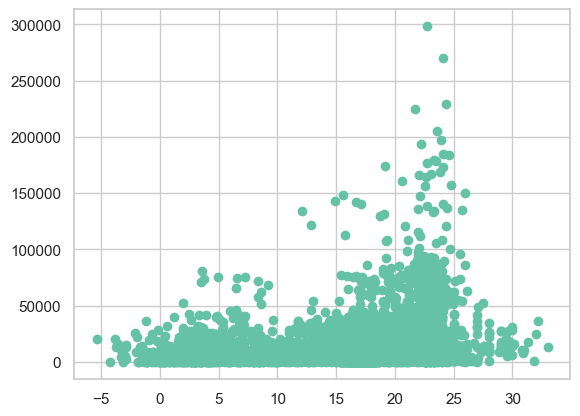

In [52]:

#creando figura 
fi, ax = plt.subplots()
# Crear gráfico de densidad
ax.scatter(df_retocado["minimum_temperature_celsius"], df_retocado["new_confirmed"])

plt.show()



##### A.1  Historigrama de densidad por país:  casos acumulados por cada mil habitantes

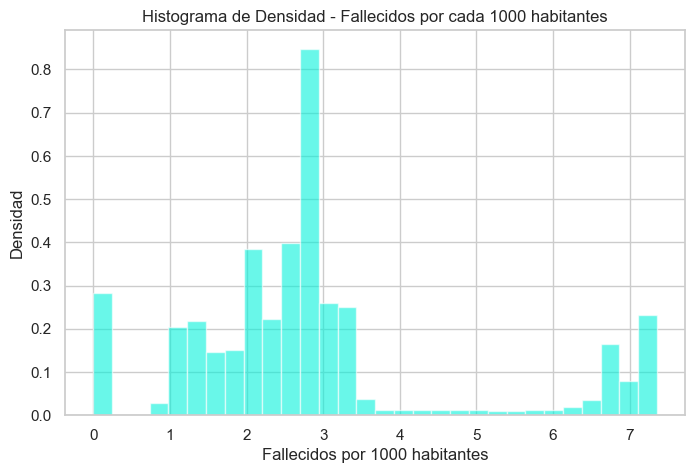

In [86]:
# Histograma de densidad con Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(df_retocado["muertes_por_1000"], bins=30, density=True, alpha=0.6, color="#05F2DB")
plt.title("Histograma de Densidad - Fallecidos por cada 1000 habitantes")
plt.xlabel("Fallecidos por 1000 habitantes")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


##### B.Gráfico de Barras por país : vacunación acumulada 


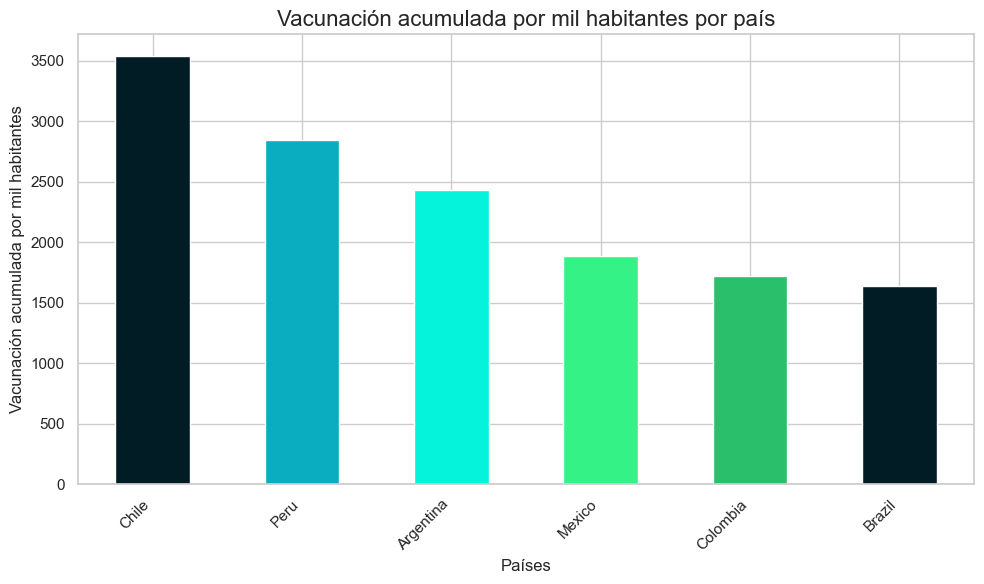

In [54]:


# Agrupar por país y calcular la vacunación acumulada por 100,000 habitantes
vacunacion_por_pais = df_retocado.groupby('country_name')['vacunas_por_1000'].max()

# Ordenar los países por vacunación acumulada para facilitar la comparación
vacunacion_por_pais = vacunacion_por_pais.sort_values(ascending=False)

# Graficar el gráfico de barras
plt.figure(figsize=(10,6))
vacunacion_por_pais.plot(kind='bar', color=['#021C26', '#0AADBF', '#05F2DB', '#35F287', '#2ABF6B'])

# Personalizar el gráfico
plt.title('Vacunación acumulada por mil habitantes por país', fontsize=16)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Vacunación acumulada por mil habitantes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


##### C. Mapas de calor: correlacion entre variables clave

In [55]:
# Agrupo variable a analizar
df_pais = df_retocado.groupby("country_name").agg({
    "muertes_por_1000": "max",
    "casos_por_1000": "max",
    "vacunas_por_1000": "max",
   "comorbidity_mortality_rate": "max",
   'infant_mortality_rate': "max",
    'population_rural': "max"     
}).reset_index()




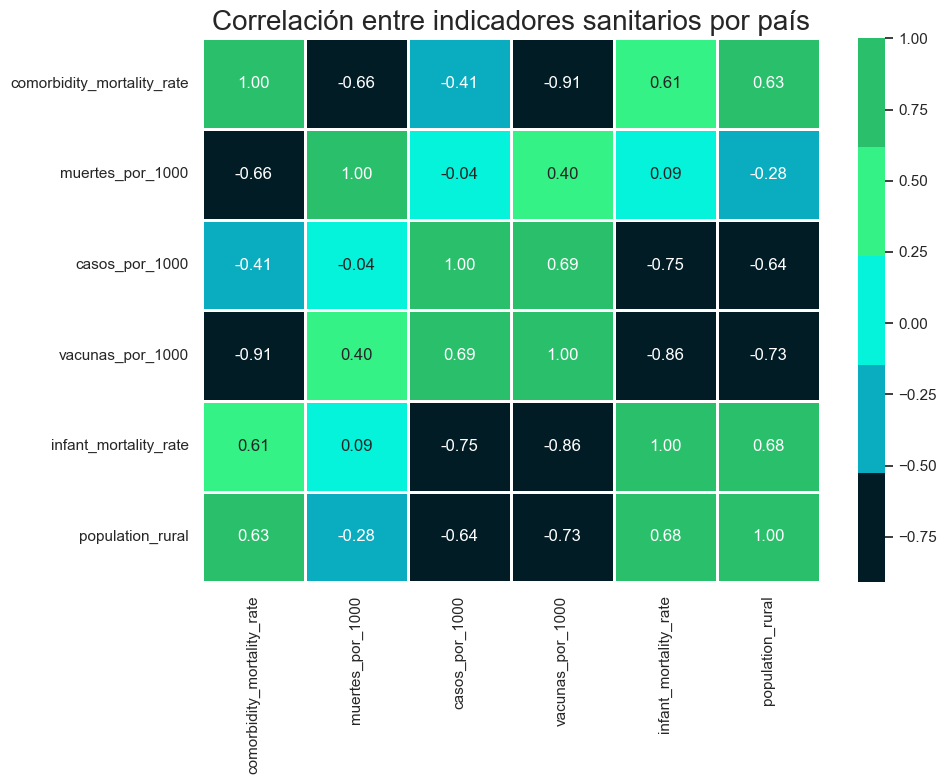

In [56]:


# Subconjunto de columnas clave
variables = df_pais[["comorbidity_mortality_rate", "muertes_por_1000", "casos_por_1000", "vacunas_por_1000",'infant_mortality_rate', 'population_rural']]

# Calcular correlación
correlacion = variables.corr()

# Paleta de tu logo
colores = ["#021C26", "#0AADBF", "#05F2DB", "#35F287", "#2ABF6B"]

# Graficar el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap=colores, fmt=".2f", linewidths=1)
plt.title("Correlación entre indicadores sanitarios por país", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### Mapa de calor correlaciones entre Factores Ambientales  letalidad y casos activos

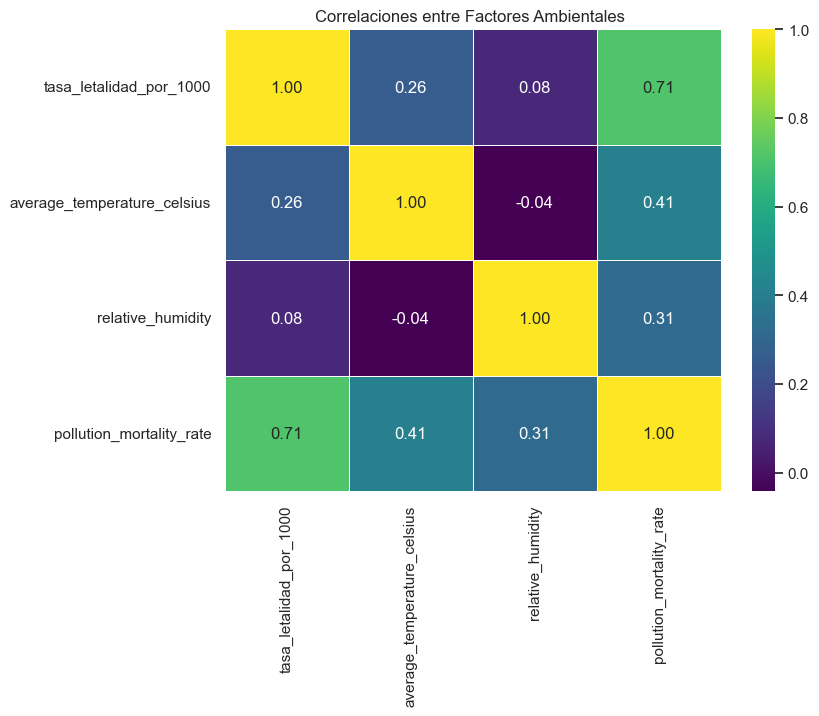

In [57]:


# Filtrar las columnas necesarias
df_correlacion = df_retocado[["tasa_letalidad_por_1000", 'average_temperature_celsius', 'relative_humidity', 'pollution_mortality_rate']]

# Calcular la matriz de correlación
correlation_matrix = df_correlacion.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlaciones entre Factores Ambientales ")
plt.show()



El gráfico parece indicar relaciones más fuertes entre temperatura, mortalidad por contaminación y factores de humedad, mientras que los casos de COVID-19 tienen una relación más débil con estos factores ambientales.

##### D. Diagrama de Dispersión: 

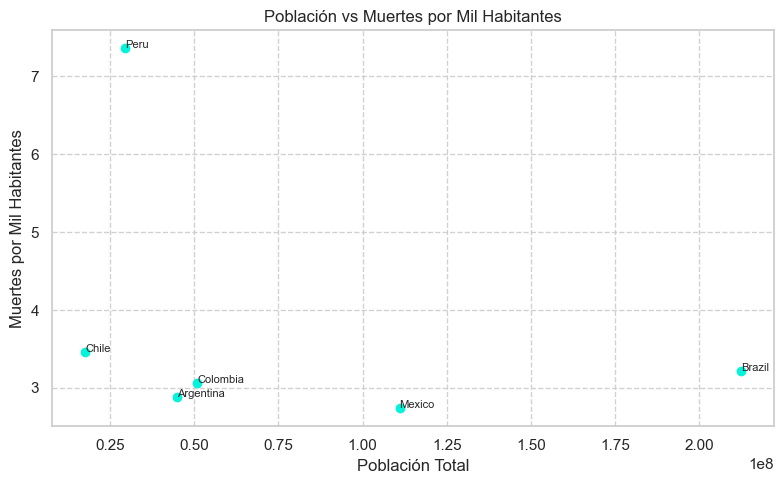

In [58]:
import matplotlib.pyplot as plt

# Agrupamos los datos por país
df_paises = df_retocado.groupby('country_name').agg({
    'population': 'max',
    'muertes_por_1000': 'max'
}).reset_index()


# Creamos el scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_paises['population'], df_paises['muertes_por_1000'], color='#05F2DB')

# Agregamos etiquetas
plt.title('Población vs Muertes por Mil Habitantes')
plt.xlabel('Población Total')
plt.ylabel('Muertes por Mil Habitantes')

# Agregamos nombres de países a cada punto
for i, fila in df_paises.iterrows():
    plt.text(fila['population'], fila['muertes_por_1000'], fila['country_name'], fontsize=8)

plt.grid(True, linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


### 5. Tendencias clave

#### Impacto Sanitario : evaluar incidencias

##### Vacunas administradas por cada mil habitantes por país

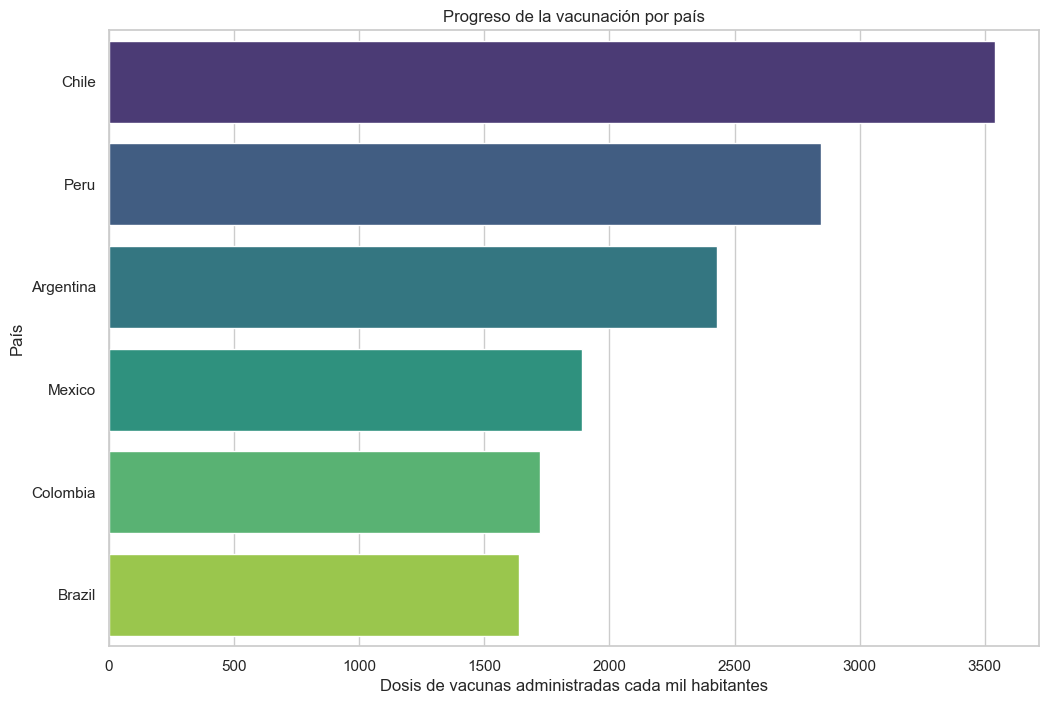

In [59]:
# - Comparación de Estrategias de Vacunación en América Latina
df_vacunas = df_retocado.groupby('country_name')['vacunas_por_1000'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= df_vacunas.values, y=df_vacunas.index, hue= df_vacunas.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas cada mil habitantes')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

##### Tendencia de la Tasa de Casos Confirmados por mil habitantes a lo Largo del Tiempo por País

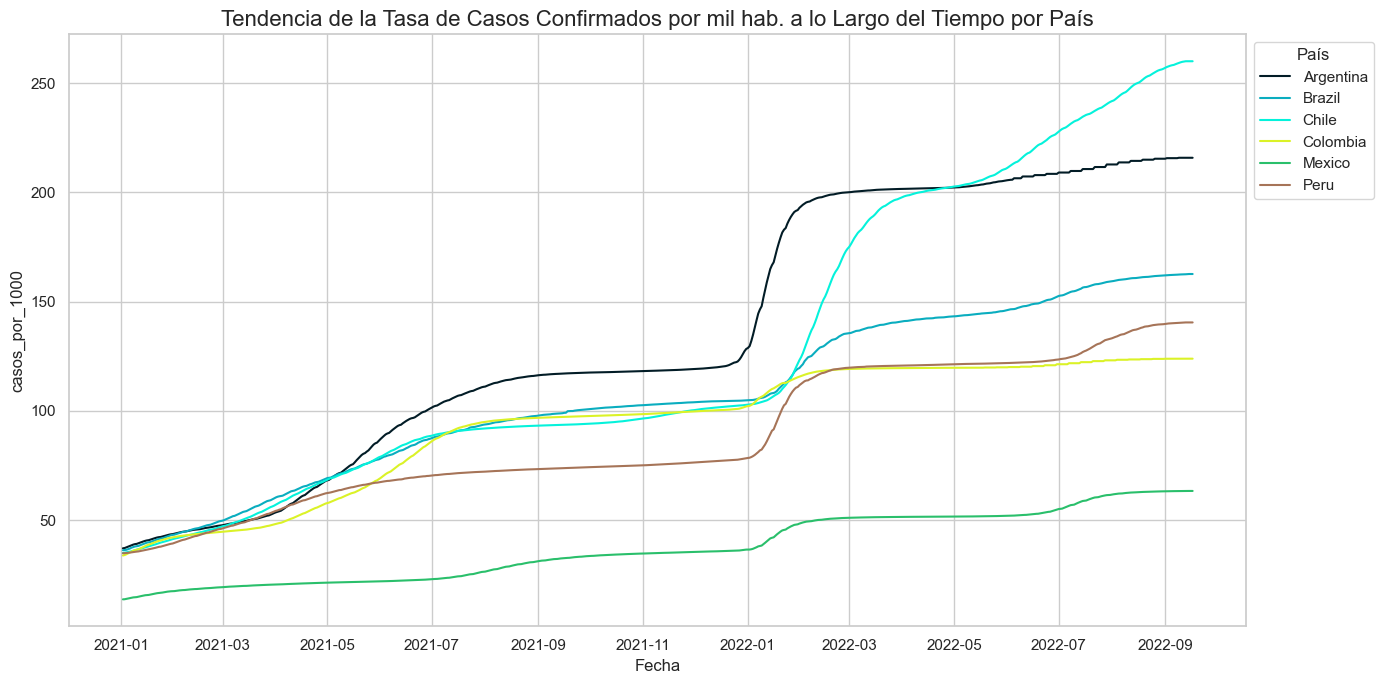

In [60]:
# Recalcular casos por 1000 habitantes con los datos corregidos
df_retocado['casos_por_1000'] = (df_retocado['cumulative_confirmed'] / df_retocado['population']) * 1000


# Filtrar las columnas necesarias
df_casos = df_retocado[['date', 'country_name', 'casos_por_1000']].dropna()




# Establecer estilo y colores
sns.set(style="whitegrid")
colores = ['#021C26', '#0AADBF', '#05F2DB', '#DBF227', '#2ABF6B','#A67458']  # Colores del logo

# Graficar la tendencia
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_casos, x='date', y='casos_por_1000', hue='country_name', palette=colores)


plt.title('Tendencia de la Tasa de Casos Confirmados por mil hab. a lo Largo del Tiempo por País', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('casos_por_1000')
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Definicion de Grupo de riesgo

 Todos los países muestran una similitud en cantidad personas de riesgo por mil habitantes
Cabe aclarar que el grupo de riesgo se defino por adultos mayores - tercera edad - Fumadores - Diabetes 

In [61]:
# Agrupamos y sumamos las columnas de interés
df_mayores = df_retocado.groupby('country_name').agg({
    'population_adultos_mayores': 'sum',
    'population_tercera_edad': 'sum',
    'population': 'sum'
}).reset_index()

# Calculamos el total de personas mayores
df_mayores['total_mayores'] = df_mayores['population_adultos_mayores'] + df_mayores['population_tercera_edad']

# Calculamos el indicador por cada 100 mil habitantes
df_mayores['mayores_por_1000'] = (df_mayores['total_mayores'] / df_mayores['population']) * 1000

# Ordenamos para visualizar mejor
df_mayores = df_mayores.sort_values('mayores_por_1000', ascending=False)

print(df_mayores[['country_name', 'mayores_por_1000']])


  country_name  mayores_por_1000
2        Chile            322.91
1       Brazil            255.36
3     Colombia            240.57
0    Argentina            214.47
5         Peru            213.40
4       Mexico            171.32


C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\784695222.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_riesgo, x='country_name', y='porcentaje', palette=['#021C26', '#0AADBF', '#05F2DB', '#35F287', '#2ABF6B', '#F28F6B'])


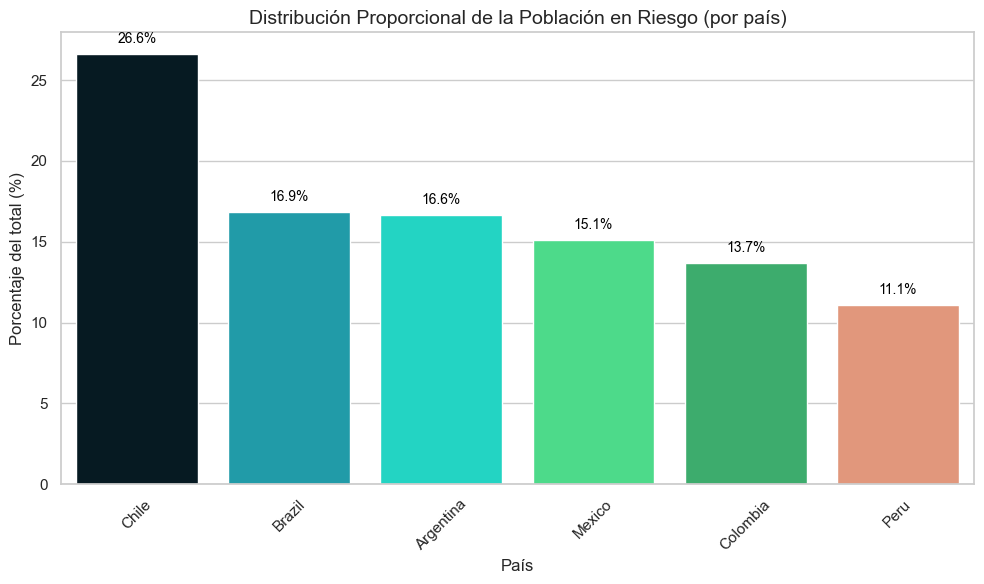

In [62]:
df_retocado['mayores'] = df_retocado['population_adultos_mayores'] + df_retocado['population_tercera_edad']
df_retocado['mayores_por_1000'] = (df_retocado['mayores'] / df_retocado['population']) * 1000
df_retocado['diabetes_por_1000'] = (df_retocado['diabetes_prevalence'] / 100) * 1000
df_retocado['smoking_por_1000'] = (df_retocado['smoking_prevalence'] / 100) * 1000

# Crear la columna total
df_retocado['poblacion_riesgo_1000'] = df_retocado['mayores_por_1000'] + df_retocado['diabetes_por_1000'] + df_retocado['smoking_por_1000']


df_riesgo = df_retocado.groupby('country_name')['poblacion_riesgo_1000'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Agrupamos y ordenamos
df_riesgo = df_retocado.groupby('country_name')['poblacion_riesgo_1000'].mean().reset_index()
df_riesgo = df_riesgo.sort_values('poblacion_riesgo_1000', ascending=False)

# 2. Calculamos el porcentaje del total
total = df_riesgo['poblacion_riesgo_1000'].sum()
df_riesgo['porcentaje'] = (df_riesgo['poblacion_riesgo_1000'] / total) * 100

# 3. Gráfico
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=df_riesgo, x='country_name', y='porcentaje', palette=['#021C26', '#0AADBF', '#05F2DB', '#35F287', '#2ABF6B', '#F28F6B'])

# Agregamos etiquetas
for bar in bars.patches:
    porcentaje = f"{bar.get_height():.1f}%"
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, porcentaje,
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribución Proporcional de la Población en Riesgo (por país)', fontsize=14)
plt.ylabel('Porcentaje del total (%)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





#### Distribución población por país

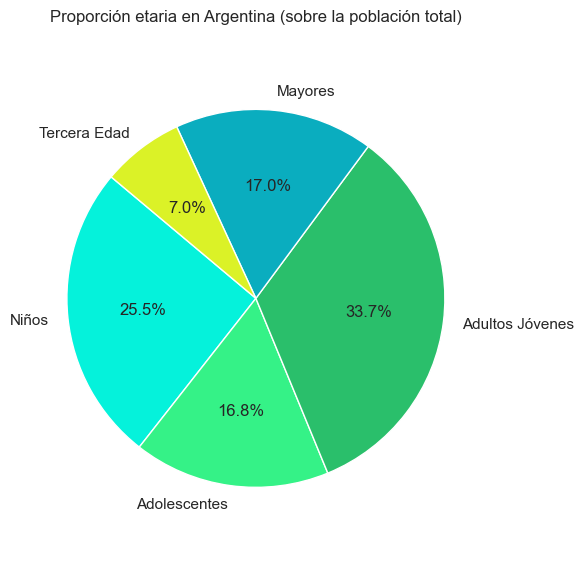

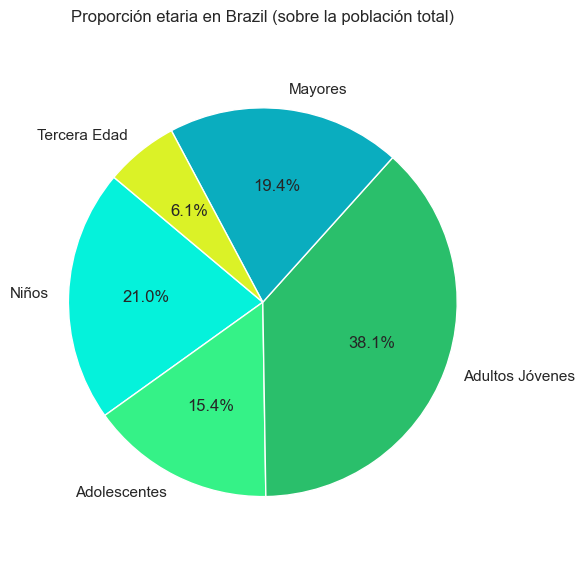

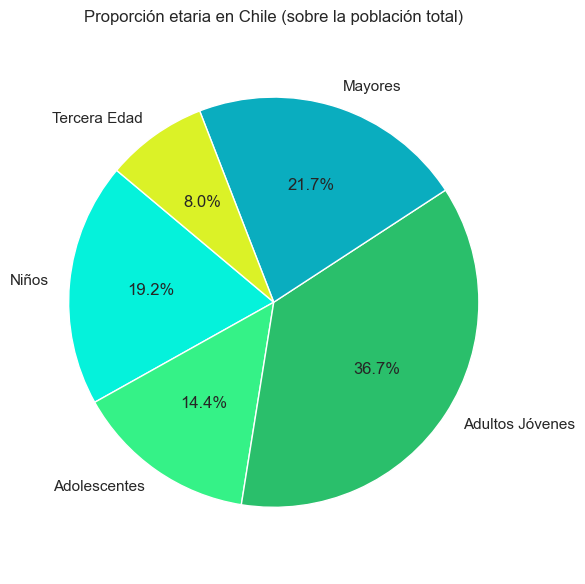

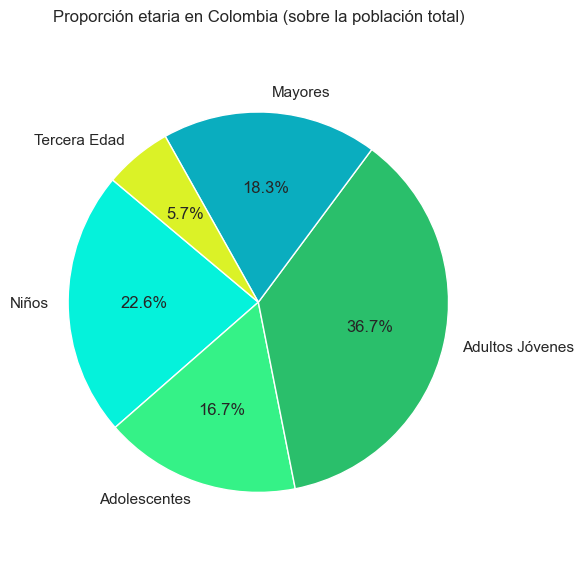

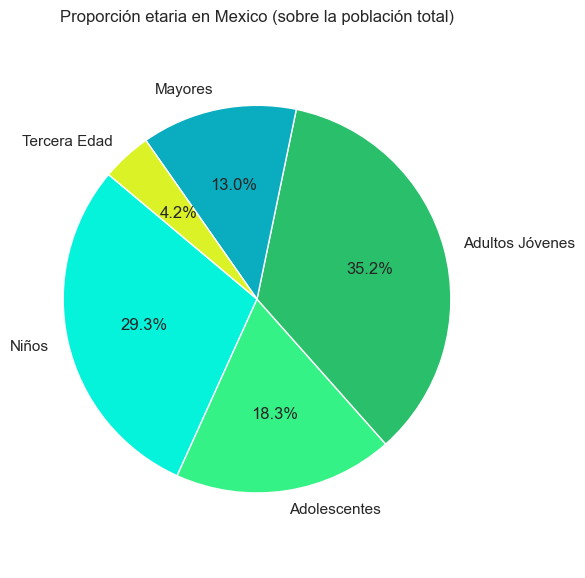

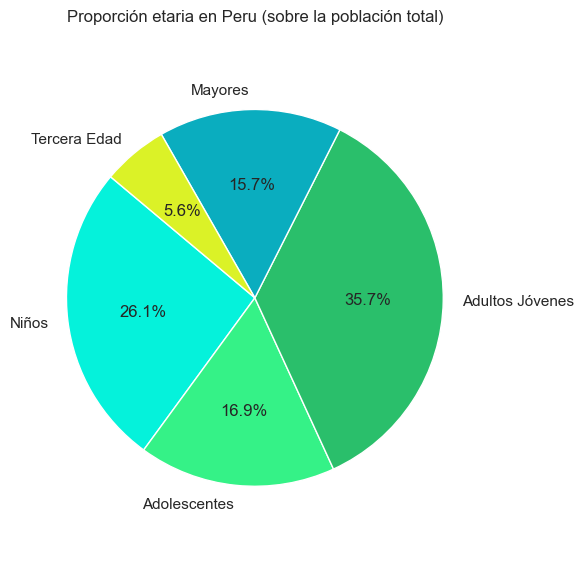

In [63]:
import matplotlib.pyplot as plt

# Lista de países únicos
paises = df_retocado['country_name'].unique()

# Etiquetas y colores
etiquetas = ['Niños', 'Adolescentes', 'Adultos Jóvenes', 'Mayores', 'Tercera Edad']
colores = ['#05F2DB', '#35F287', '#2ABF6B', '#0AADBF', '#DBF227']  # paleta Biogenesys

# Bucle para generar un gráfico por país
for pais in paises:
    df_pais = df_retocado[df_retocado['country_name'] == pais]
    
    # Promediamos los valores absolutos por población total en ese país
    total_poblacion = df_pais['population'].mean()  # Promedio de la población total del país
    proporciones = [
        df_pais['population_niños'].mean() / total_poblacion,
        df_pais['population_adolescentes'].mean() / total_poblacion,
        df_pais['population_adultos_jovenes'].mean() / total_poblacion,
        df_pais['population_adultos_mayores'].mean() / total_poblacion,
        df_pais['population_tercera_edad'].mean() / total_poblacion
    ]
    
    # Convertir proporciones a porcentajes
    valores = [p * 100 for p in proporciones]
    
    # Graficar
    plt.figure(figsize=(6, 6))
    plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=140)
    plt.title(f'Proporción etaria en {pais} (sobre la población total)')
    plt.axis('equal')  # Para que el círculo no esté ovalado
    plt.tight_layout()
    plt.show()


##### Comparaciones por países Tasa Letalidad Casos y Muertes

In [64]:
# Paso 1: Agrupar los datos por país
df_mortalidad = df_retocado.groupby('country_name').agg({
    'tasa_letalidad_por_1000': 'max',
      'casos_por_1000':"max",
     'muertes_por_1000':"max"  # Máximo de muertes acumuladas
}).reset_index()



# Paso 3: Verificamos que la columna esté bien creada
print(df_mortalidad)

  country_name  tasa_letalidad_por_1000  casos_por_1000  muertes_por_1000
0    Argentina                    27.96          215.80              2.89
1       Brazil                    28.02          162.63              3.22
2        Chile                    27.15          259.96              3.46
3     Colombia                    30.64          123.90              3.06
4       Mexico                    99.10           63.40              2.74
5         Peru                    94.06          140.48              7.36


Aqui se puede observar como México teniendo muy pocos contagios tubo una tasa de letalidad alta, los demás países tuvieron el doble de casos con la misma cantidad de muerte. México tuvo la mitad de casos y la misma cantidad de muerte que los demas países sin incluir Perú ya que es el que encabeza la lista de perdidas.

C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\2611558540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='muertes_por_1000', data=df_retocado, ax=axs[0], palette='viridis')
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\2611558540.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\2611558540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='casos_por_1000', data=df_retocado, ax=axs[1], palette='viridis')
C:\Users\Bruger\AppData\Local\Temp\

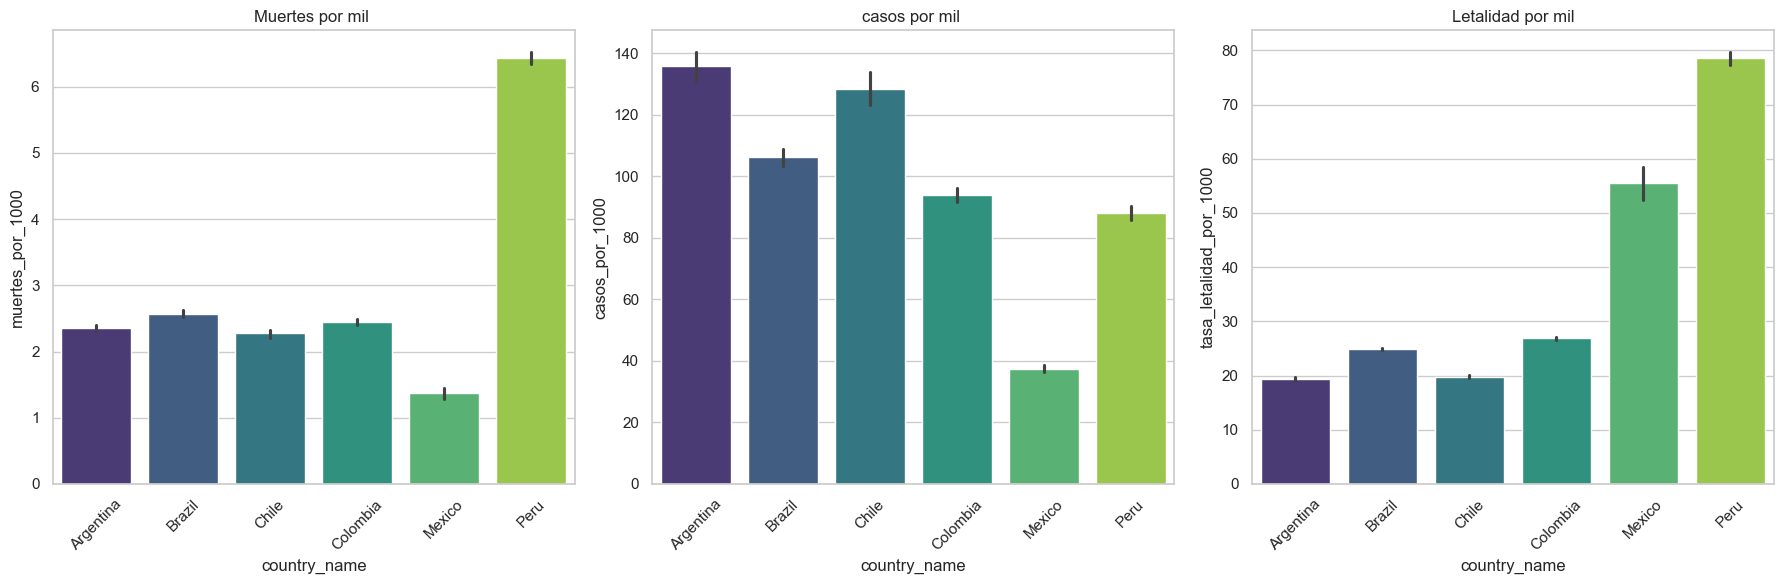

In [65]:


# Ahora generamos los gráficos para comparar

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para muertes por 100K en zonas rurales
sns.barplot(x='country_name', y='muertes_por_1000', data=df_retocado, ax=axs[0], palette='viridis')
axs[0].set_title('Muertes por mil ')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Gráfico para casos por 100K en zonas urbanas
sns.barplot(x='country_name', y='casos_por_1000', data=df_retocado, ax=axs[1], palette='viridis')
axs[1].set_title('casos por mil ')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Gráfico para letalidad por 100K en ciudades grandes
sns.barplot(x='country_name', y='tasa_letalidad_por_1000', data=df_retocado, ax=axs[2], palette='viridis')
axs[2].set_title('Letalidad por mil')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)




plt.tight_layout()
plt.show()





 Grafico Torta para ver Zonas rurales por país

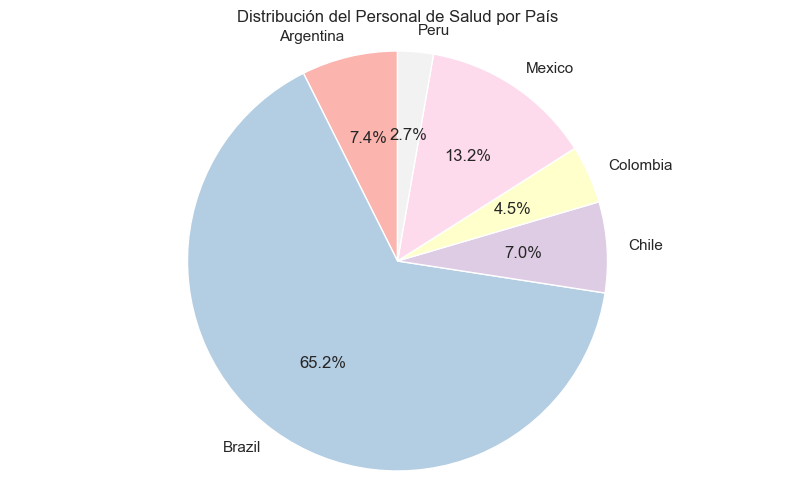

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por país y sumar las tasas de enfermeras y médicos por cada 1000 habitantes
# Para fines de este gráfico, se puede mostrar la cantidad de personal sanitario por país (puedes decidir qué variable mostrar)

# Calculamos la cantidad total de personal sanitario por país
df_retocado['total_nurses'] = df_retocado['nurses_per_1000'] * df_retocado['population'] / 1000
df_retocado['total_physicians'] = df_retocado['physicians_per_1000'] * df_retocado['population'] / 1000

# Agregar los datos a nivel país
personal_sanitario_por_pais = df_retocado.groupby('country_name')[['total_nurses', 'total_physicians']].sum()

# Crear gráfico de torta
personal_sanitario_por_pais['total_personal'] = personal_sanitario_por_pais['total_nurses'] + personal_sanitario_por_pais['total_physicians']

# Crear un gráfico de torta con la cantidad total de personal sanitario por país
plt.figure(figsize=(10, 6))
plt.pie(personal_sanitario_por_pais['total_personal'], labels=personal_sanitario_por_pais.index, autopct='%1.1f%%', startangle=90, colors = plt.cm.Pastel1(np.linspace(0, 1, len(personal_sanitario_por_pais)))
)
plt.title('Distribución del Personal de Salud por País')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


#### Infrastructura medica por país

##### Muertes por mil habitantes por Zonas Rurales, Urbanas, Ciudades Grandes

C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\156762364.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='muertes_rurales_1000', data=df_retocado, ax=axs[0], palette='viridis')
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\156762364.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\156762364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='muertes_urbanas_1000', data=df_retocado, ax=axs[1], palette='viridis')
C:\Users\Bruger\AppData\Lo

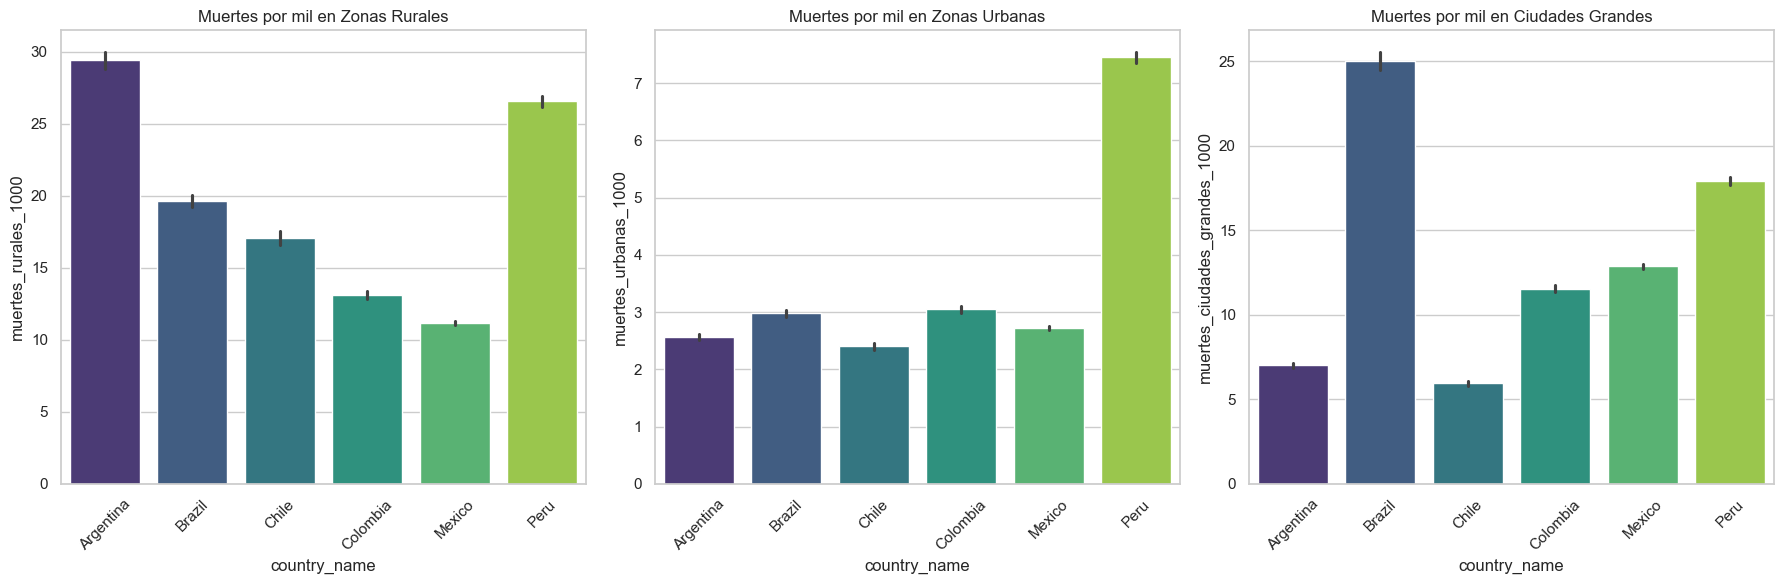

In [66]:

# Asegurémonos de que tienes las columnas correctas
df_retocado['muertes_rurales_1000'] = df_retocado['cumulative_deceased'] / df_retocado['population_rural'] * 1000
df_retocado['muertes_urbanas_1000'] = df_retocado['cumulative_deceased'] / df_retocado['population_urban'] * 1000
df_retocado['muertes_ciudades_grandes_1000'] = df_retocado['cumulative_deceased'] / df_retocado['population_largest_city'] * 1000

# Ahora generamos los gráficos para comparar

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para muertes por 100K en zonas rurales
sns.barplot(x='country_name', y='muertes_rurales_1000', data=df_retocado, ax=axs[0], palette='viridis')
axs[0].set_title('Muertes por mil en Zonas Rurales')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# Gráfico para muertes por 100K en zonas urbanas
sns.barplot(x='country_name', y='muertes_urbanas_1000', data=df_retocado, ax=axs[1], palette='viridis')
axs[1].set_title('Muertes por mil en Zonas Urbanas')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Gráfico para muertes por 100K en ciudades grandes
sns.barplot(x='country_name', y='muertes_ciudades_grandes_1000', data=df_retocado, ax=axs[2], palette='viridis')
axs[2].set_title('Muertes por mil en Ciudades Grandes')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Podemos observar que Perú muestra una alta tasa de fallecimientos en zonas rurales como tambien en grandes ciudades en comparación a otros países 
Aunque tambien se destacan países como Argentina y Brasil ambos con alto números de fallecidos en zonas rurales   y Brasil particularmente tambien se repite el alto número en grandes ciudades seguido de MExico  

##### Cantidad de profesionales de la salud

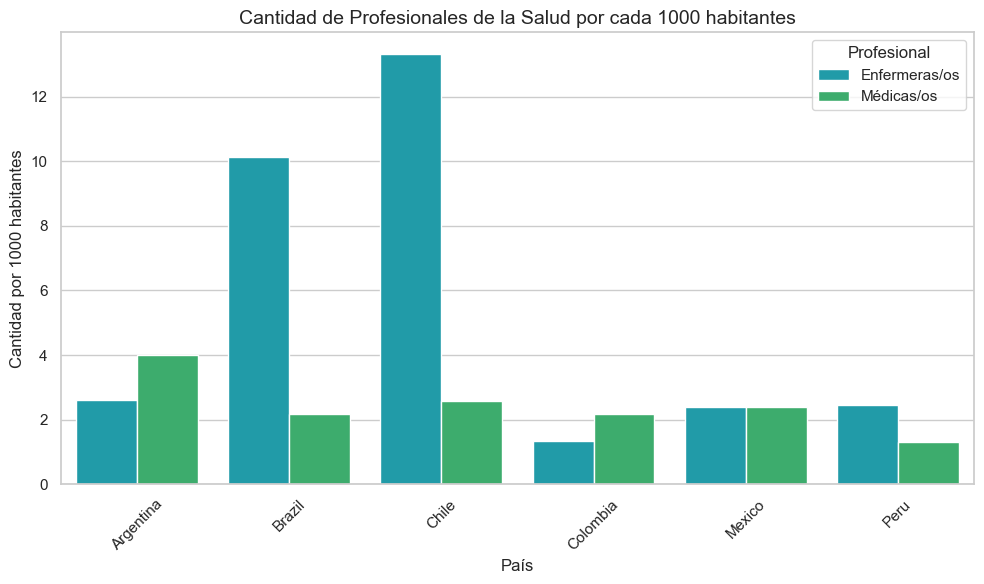

In [67]:
# Agrupar por país
infra = df_retocado.groupby('country_name')[['nurses_per_1000', 'physicians_per_1000']].mean().reset_index()

# Convertir a formato largo
infra_largo = pd.melt(infra, 
                      id_vars='country_name', 
                      value_vars=['nurses_per_1000', 'physicians_per_1000'],
                      var_name='profesional', 
                      value_name='por_1000_hab')

# Renombrar los valores de la columna 'profesional'
infra_largo['profesional'] = infra_largo['profesional'].replace({
    'nurses_per_1000': 'Enfermeras/os',
    'physicians_per_1000': 'Médicas/os'
})

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=infra_largo, x='country_name', y='por_1000_hab', hue='profesional',
            palette=['#0AADBF', '#2ABF6B'])

plt.title('Cantidad de Profesionales de la Salud por cada 1000 habitantes', fontsize=14)
plt.ylabel('Cantidad por 1000 habitantes')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Profesional')
plt.tight_layout()
plt.show()


##### Personal medico por zonas 

In [68]:
df_retocado['personal_salud_rural'] = (df_retocado['nurses_per_1000'] + df_retocado['physicians_per_1000']) * (df_retocado['population_rural'] / 1000)
df_retocado['personal_salud_urbana'] = (df_retocado['nurses_per_1000'] + df_retocado['physicians_per_1000']) * (df_retocado['population_urban'] / 1000)
df_retocado['personal_salud_gran_ciudad'] = (df_retocado['nurses_per_1000'] + df_retocado['physicians_per_1000']) * (df_retocado['population_largest_city'] / 1000)


In [69]:
# preparacion para  graficar 
df_salud = df_retocado[['country_name', 
                        'personal_salud_rural', 
                        'personal_salud_urbana', 
                        'personal_salud_gran_ciudad']]

df_salud_melt = df_salud.melt(id_vars='country_name',
                              value_vars=['personal_salud_rural', 
                                          'personal_salud_urbana', 
                                          'personal_salud_gran_ciudad'],
                              var_name='zona',
                              value_name='personal_salud')

df_salud_melt['zona'] = df_salud_melt['zona'].str.replace('personal_salud_', '').str.replace('_', ' ').str.title()


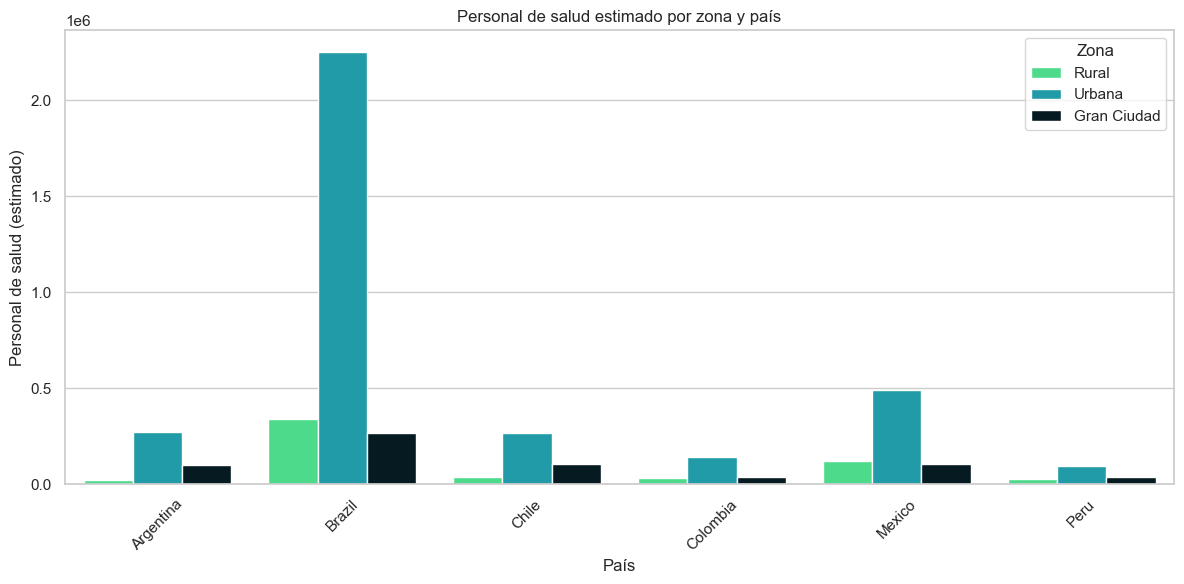

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_salud_melt, x='country_name', y='personal_salud', hue='zona',
            palette=['#35F287', '#0AADBF', '#021C26'])

plt.title('Personal de salud estimado por zona y país')
plt.xlabel('País')
plt.ylabel('Personal de salud (estimado)')
plt.legend(title='Zona')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Condiciones Socioeconomicas entre Países 

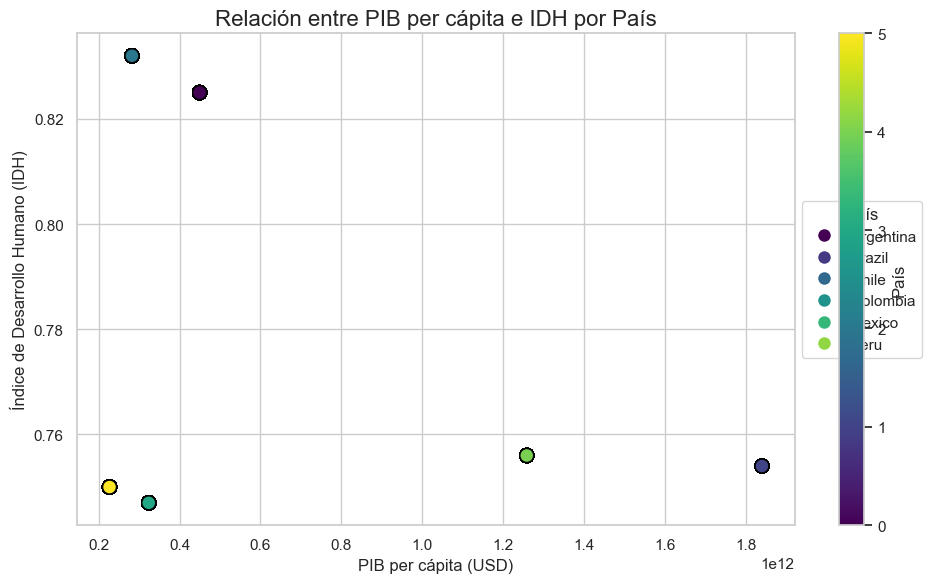

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un mapeo de colores a países
country_codes = df_retocado['country_name'].astype('category').cat.codes
country_names = df_retocado['country_name'].unique()

# Graficar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_retocado['gdp_usd'], df_retocado['human_development_index'], 
                      c=country_codes, cmap='viridis', s=100, edgecolor='black')

# Titulo y etiquetas
plt.title('Relación entre PIB per cápita e IDH por País', fontsize=16)
plt.xlabel('PIB per cápita (USD)', fontsize=12)
plt.ylabel('Índice de Desarrollo Humano (IDH)', fontsize=12)

# Agregar la barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('País')

# Ajustar la barra de colores para que no se superponga con los puntos
plt.subplots_adjust(right=0.85)

# Crear la leyenda para los países
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / len(country_names)), markersize=10) 
           for i in range(len(country_names))]
plt.legend(handles, country_names, title="País", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


## Avance 3 - Preparar nuestros datos para una visualización avanzada

#### Calculos avanzados de series Temporales

In [89]:


# Asegúrate de tener la fecha como índice
df_retocado['date'] = pd.to_datetime(df_retocado['date'])  # Convierte la columna 'date' a tipo datetime

# Filtra los datos solo para Perú
peru = df_retocado[df_retocado['country_name'] == 'Peru'].sort_values('date')

# Crear la serie temporal con los casos nuevos confirmados
serie_peru = peru.set_index('date')['new_deceased'].resample('M').sum()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\3241706572.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie_peru = peru.set_index('date')['new_deceased'].resample('M').sum()


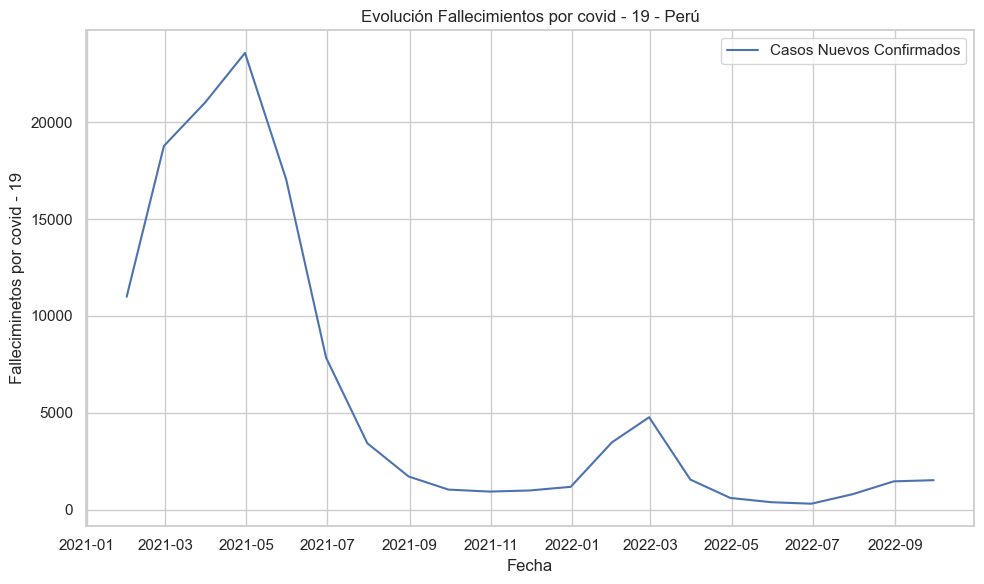

In [82]:
import matplotlib.pyplot as plt

# Graficar la serie temporal
plt.figure(figsize=(10,6))
plt.plot(serie_peru, label='Casos Nuevos Confirmados', color='b')
plt.title('Evolución Fallecimientos por covid - 19 - Perú')
plt.xlabel('Fecha')
plt.ylabel('Falleciminetos por covid - 19')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


####  - Series Temporales (intervalos de tiempo)

##### Relación temporal vacunación por país y casos nuevos

C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1678917739.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trim = df_pais.resample('Q', on='date').mean(numeric_only=True)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1678917739.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trim = df_pais.resample('Q', on='date').mean(numeric_only=True)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1678917739.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trim = df_pais.resample('Q', on='date').mean(numeric_only=True)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1678917739.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_trim = df_pais.resample('Q', on='date').mean(numeric_only=True)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27712\1

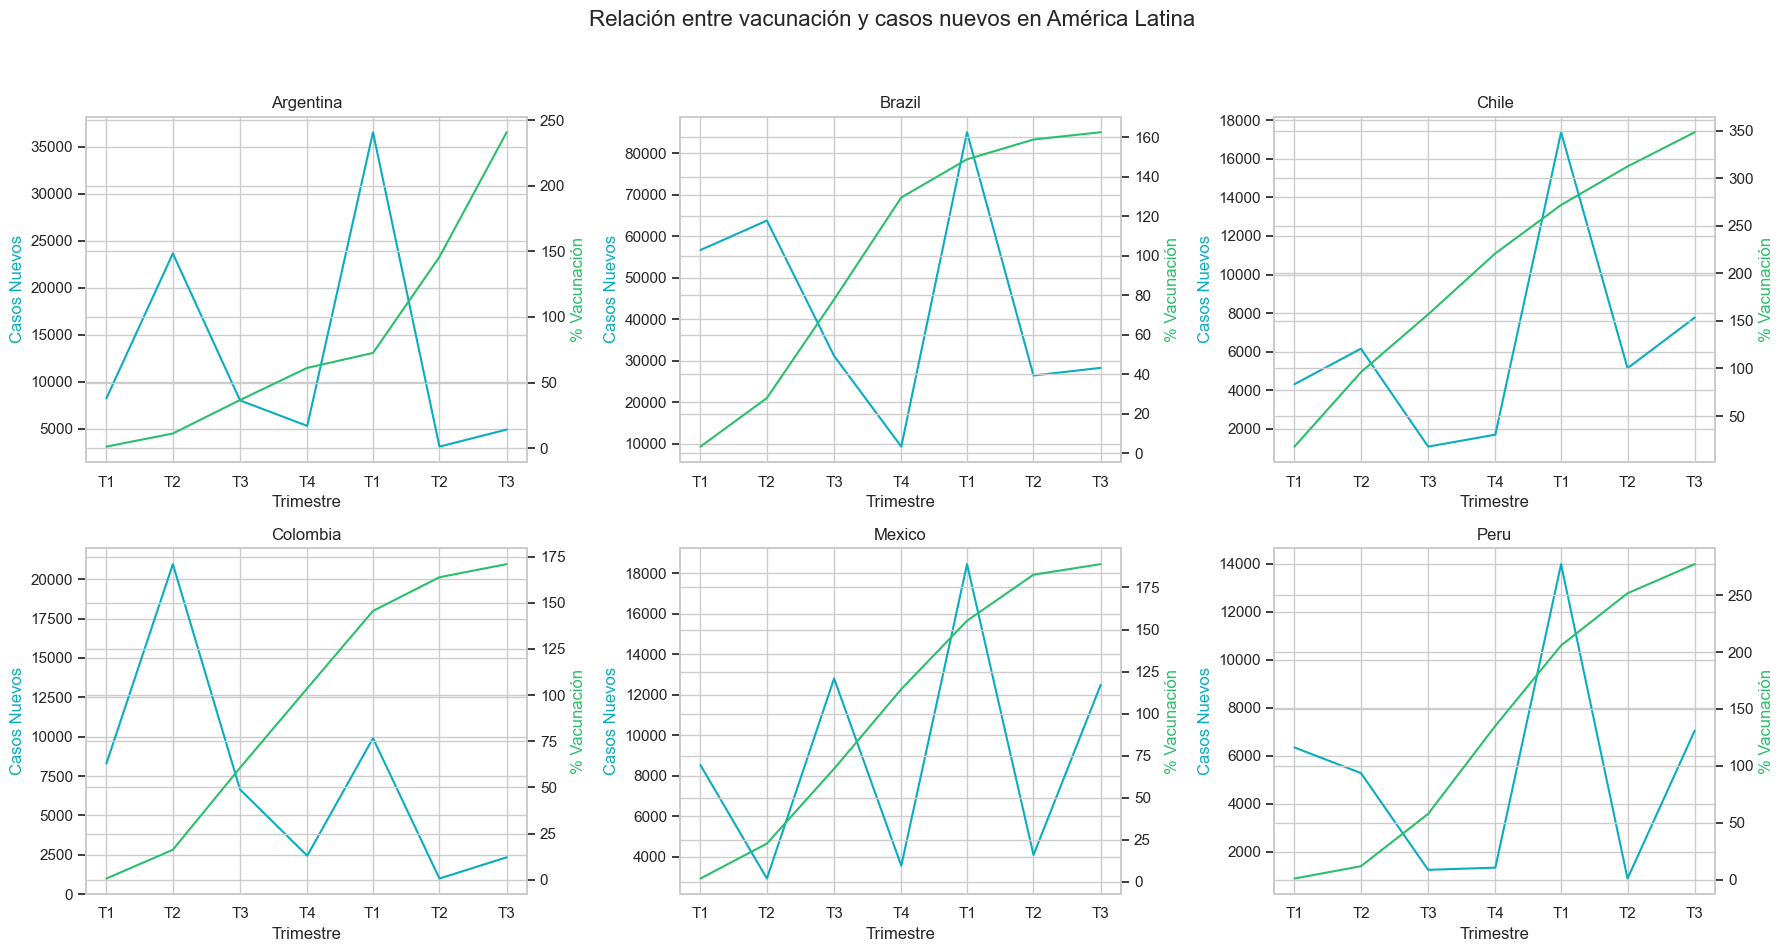

In [76]:
import matplotlib.pyplot as plt

# Lista de países
paises = df_retocado['country_name'].unique()

# Crear figura con subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, pais in enumerate(paises):
    df_pais = df_retocado[df_retocado['country_name'] == pais].copy()

    # Asegurar que la columna date esté en formato datetime
    df_pais['date'] = pd.to_datetime(df_pais['date'])

    # Calcular porcentaje de vacunación
    df_pais['percentage_vaccinated'] = df_pais['cumulative_vaccine_doses_administered'] / df_pais['population'] * 100

    # Agrupar por TRIMESTRE asi se interpretaban mejor el eje X
    df_trim = df_pais.resample('Q', on='date').mean(numeric_only=True)

    # Crear gráfico
    ax1 = axs[i]
    ax2 = ax1.twinx()

    # Casos nuevos (línea azul)
    ax1.plot(df_trim.index, df_trim['new_confirmed'], color='#0AADBF', label='Casos Nuevos')
    ax1.set_ylabel('Casos Nuevos', color='#0AADBF')

    # % vacunados (línea verde)
    ax2.plot(df_trim.index, df_trim['percentage_vaccinated'], color='#2ABF6B', label='Vacunados')
    ax2.set_ylabel('% Vacunación', color='#2ABF6B')

    # Título y etiquetas
    ax1.set_title(pais)
    ax1.set_xlabel('Trimestre')

    # Etiquetas personalizadas para el eje X: T1, T2, T3, T4
    trimestres = df_trim.index.quarter  # Extrae 1, 2, 3, 4
    etiquetas = [f'T{t}' for t in trimestres]
    ax1.set_xticks(df_trim.index)
    ax1.set_xticklabels(etiquetas)

# Título general y ajuste de diseño
plt.suptitle('Relación entre vacunación y casos nuevos en América Latina', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##### Muertes acumuladas por paises a lo largo del tiempo

<Figure size 1200x600 with 0 Axes>

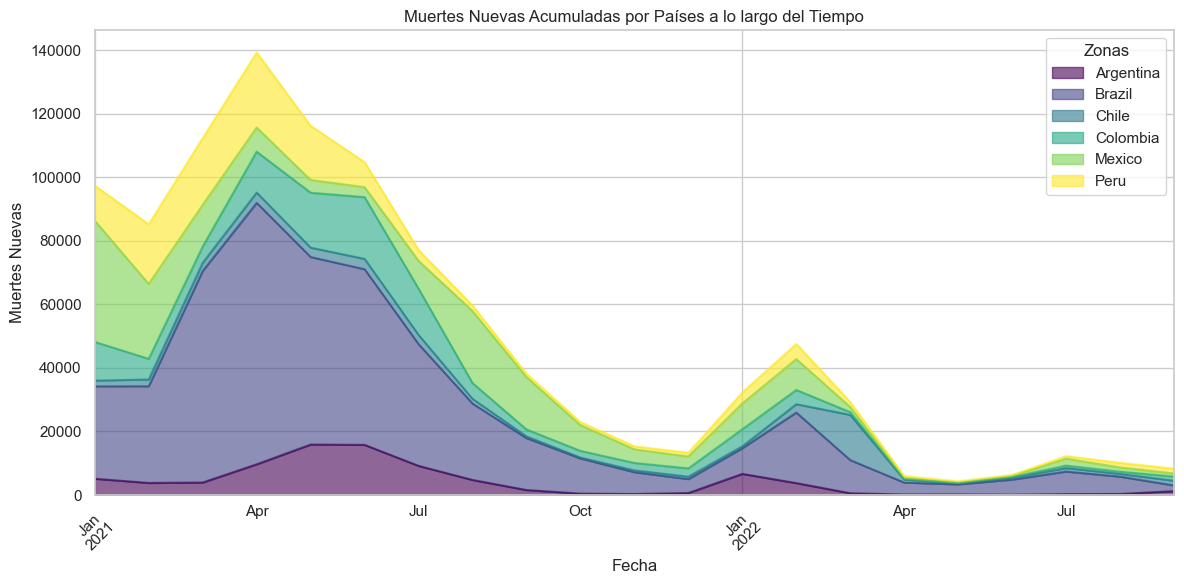

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'date' esté en formato datetime
df_retocado['date'] = pd.to_datetime(df_retocado['date'])

# Agrupar por fecha y zona geográfica (país)
df_grouped = df_retocado.groupby([df_retocado['date'].dt.to_period('M'), 'country_name'])['new_deceased'].sum().reset_index()

# Convertir 'date' de period a datetime para graficar
df_grouped['date'] = df_grouped['date'].dt.to_timestamp()

# Pivotar los datos para tener las zonas como columnas
df_pivot = df_grouped.pivot_table(index='date', columns='country_name', values='new_deceased', aggfunc='sum')

# Crear el gráfico de líneas apiladas
plt.figure(figsize=(12, 6))
df_pivot.plot(kind='area', stacked=True, figsize=(12, 6), cmap="viridis", alpha=0.6)

# Ajustar el gráfico
plt.title('Muertes Nuevas Acumuladas por Países a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Muertes Nuevas')
plt.xticks(rotation=45)
plt.legend(title='Zonas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Preparar data set para ir a power bi

Paso a power BI 

In [78]:
df_retocado.to_csv(r'C:\Users\Bruger\Desktop\df_retocado.csv', index=False)



In [79]:
print(df_Power.columns)

NameError: name 'df_Power' is not defined